In [1]:
# Importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
# Read cleaned version of data
df = pd.read_csv('nba_log_cleaned.csv')
df.head()

,Unnamed: 0,ID,GAME_ID,MATCHUP,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,...,CLOSEST_DEFENDER,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_name,player_id,CLOSEST_DEFENDER1,SHOOTER_height,DEFENDER_height
0,0,1,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,1,1,69,...,"Anderson, Alan",101187,1.3,1,2,brian roberts,203148,Alan Anderson,73,78
1,1,2,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,2,1,14,...,"Bogdanovic, Bojan",202711,6.1,0,0,brian roberts,203148,Bojan Bogdanovic,73,80
2,2,3,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,3,1,0,...,"Bogdanovic, Bojan",202711,0.9,0,0,brian roberts,203148,Bojan Bogdanovic,73,80
3,3,4,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,4,2,707,...,"Brown, Markel",203900,3.4,0,0,brian roberts,203148,Markel Brown,73,75
4,4,5,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,5,2,634,...,"Young, Thaddeus",201152,1.1,0,0,brian roberts,203148,Thaddeus Young,73,80


## Data Understanding & Some Preparing

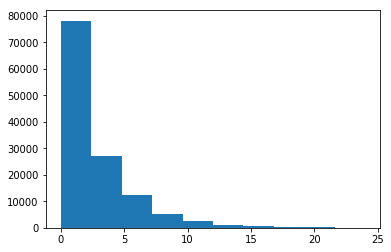

In [3]:
# Data exploration
plt.hist(df['TOUCH_TIME'], range = (0,24));

In [4]:
# Data exploration
df.describe()

,Unnamed: 0,ID,GAME_ID,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_id,SHOOTER_height,DEFENDER_height
count,128069.00000,128069.00000,1.280690e+05,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000
mean,64034.00000,64035.00000,2.140045e+07,0.208723,6.506899,2.469427,351.393811,17.932493,2.023355,2.766402,13.571504,2.264670,159038.487284,4.123015,0.452139,0.997314,157238.251247,78.955602,79.579625
std,36970.48015,36970.48015,2.578773e+02,13.233267,4.713260,1.139919,207.590603,51.834789,3.477760,3.021508,8.888964,0.441159,78791.172947,2.756446,0.497706,1.130978,79362.389336,3.642676,3.574563
min,0.00000,1.00000,2.140000e+07,-53.000000,1.000000,1.000000,0.000000,0.000000,0.000000,-99.990000,0.000000,2.000000,708.000000,0.000000,0.000000,0.000000,708.000000,69.000000,69.000000
25%,32017.00000,32018.00000,2.140023e+07,-8.000000,3.000000,1.000000,172.000000,8.000000,0.000000,0.900000,4.700000,2.000000,101249.000000,2.300000,0.000000,0.000000,101162.000000,76.000000,77.000000
50%,64034.00000,64035.00000,2.140045e+07,1.000000,5.000000,2.000000,352.000000,12.200000,1.000000,1.600000,13.700000,2.000000,201949.000000,3.700000,0.000000,0.000000,201939.000000,79.000000,80.000000
75%,96051.00000,96052.00000,2.140067e+07,9.000000,9.000000,3.000000,531.000000,16.800000,2.000000,3.700000,22.500000,3.000000,203079.000000,5.300000,1.000000,2.000000,202704.000000,82.000000,82.000000
max,128068.00000,128069.00000,2.140091e+07,53.000000,38.000000,7.000000,720.000000,712.000000,32.000000,24.900000,47.200000,3.000000,530027.000000,53.200000,1.000000,3.000000,204060.000000,86.000000,86.000000


In [5]:
# Data exploration
df[df['TOUCH_TIME'] > 23].count()

Unnamed: 0                    18
ID                            18
GAME_ID                       18
MATCHUP                       18
LOCATION                      18
W                             18
FINAL_MARGIN                  18
SHOT_NUMBER                   18
PERIOD                        18
GAME_CLOCK                    18
SHOT_CLOCK                    18
DRIBBLES                      18
TOUCH_TIME                    18
SHOT_DIST                     18
PTS_TYPE                      18
SHOT_RESULT                   18
CLOSEST_DEFENDER              18
CLOSEST_DEFENDER_PLAYER_ID    18
CLOSE_DEF_DIST                18
FGM                           18
PTS                           18
player_name                   18
player_id                     18
CLOSEST_DEFENDER1             18
SHOOTER_height                18
DEFENDER_height               18
dtype: int64

In [6]:
# Dropping unrealistic values of touch time
df = df.drop(df[df.TOUCH_TIME < 0].index)

In [7]:
# Dropping unrealistic values of touch time
df = df.drop(df[df.TOUCH_TIME > 23].index)

In [8]:
# Checking the data
df.describe()

,Unnamed: 0,ID,GAME_ID,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_id,SHOOTER_height,DEFENDER_height
count,127739.00000,127739.00000,1.277390e+05,127739.000000,127739.000000,127739.000000,127739.000000,127739.000000,127739.000000,127739.000000,127739.00000,127739.000000,127739.000000,127739.000000,127739.000000,127739.000000,127739.000000,127739.000000,127739.000000
mean,64033.93792,64034.93792,2.140045e+07,0.208793,6.505742,2.469543,351.448320,17.923970,2.025184,2.775780,13.57616,2.264962,159044.849052,4.124123,0.452485,0.998106,157229.061344,78.953898,79.579197
std,36974.81577,36974.81577,2.578969e+02,13.234422,4.712948,1.139904,207.583277,51.802718,3.470218,2.977069,8.88772,0.441315,78787.345073,2.756245,0.497739,1.131111,79370.701025,3.642885,3.575035
min,0.00000,1.00000,2.140000e+07,-53.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,2.000000,708.000000,0.000000,0.000000,0.000000,708.000000,69.000000,69.000000
25%,32012.50000,32013.50000,2.140023e+07,-8.000000,3.000000,1.000000,173.000000,8.000000,0.000000,0.900000,4.70000,2.000000,101249.000000,2.300000,0.000000,0.000000,101162.000000,76.000000,77.000000
50%,64029.00000,64030.00000,2.140045e+07,1.000000,5.000000,2.000000,352.000000,12.200000,1.000000,1.600000,13.70000,2.000000,201949.000000,3.700000,0.000000,0.000000,201939.000000,79.000000,80.000000
75%,96058.50000,96059.50000,2.140067e+07,9.000000,9.000000,3.000000,531.000000,16.800000,2.000000,3.700000,22.50000,3.000000,203078.000000,5.300000,1.000000,2.000000,202704.000000,82.000000,82.000000
max,128068.00000,128069.00000,2.140091e+07,53.000000,38.000000,7.000000,720.000000,712.000000,32.000000,22.900000,47.20000,3.000000,530027.000000,53.200000,1.000000,3.000000,204060.000000,86.000000,86.000000


In [9]:
# Checking the data 
df.isna().sum()

Unnamed: 0                    0
ID                            0
GAME_ID                       0
MATCHUP                       0
LOCATION                      0
W                             0
FINAL_MARGIN                  0
SHOT_NUMBER                   0
PERIOD                        0
GAME_CLOCK                    0
SHOT_CLOCK                    0
DRIBBLES                      0
TOUCH_TIME                    0
SHOT_DIST                     0
PTS_TYPE                      0
SHOT_RESULT                   0
CLOSEST_DEFENDER              0
CLOSEST_DEFENDER_PLAYER_ID    0
CLOSE_DEF_DIST                0
FGM                           0
PTS                           0
player_name                   0
player_id                     0
CLOSEST_DEFENDER1             0
SHOOTER_height                0
DEFENDER_height               0
dtype: int64

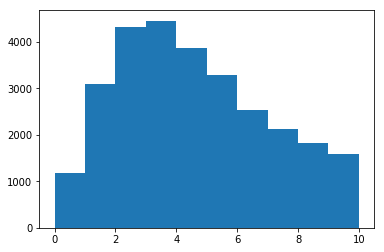

In [10]:
# Data exploration
plt.hist(df[df['LOCATION']=='H'].SHOT_DIST, range=(0,10));

In [11]:
one = df[df['LOCATION']=='H'].SHOT_DIST

In [12]:
one.to_csv('one.csv')

C:\Users\amism\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


In [13]:
two = df[df['LOCATION']=='A'].SHOT_DIST

In [14]:
two.to_csv('two.csv')

C:\Users\amism\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


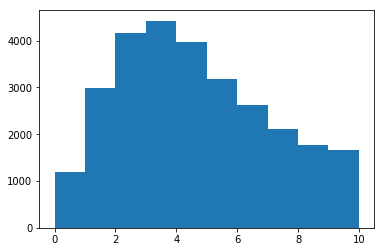

In [15]:
# Data exploration
plt.hist(df[df['LOCATION']=='A'].SHOT_DIST, range=(0,10));

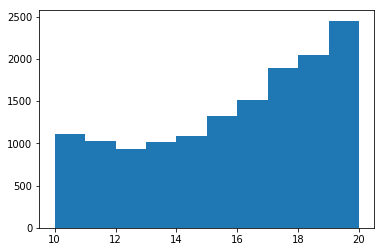

In [16]:
# Data exploration
plt.hist(df[df['LOCATION']=='H'].SHOT_DIST, range=(10,20));

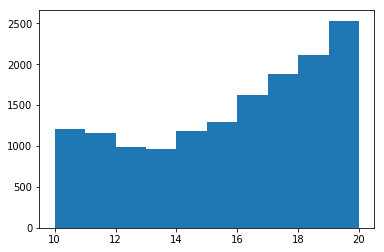

In [17]:
# Data exploration
plt.hist(df[df['LOCATION']=='A'].SHOT_DIST, range=(10,20));

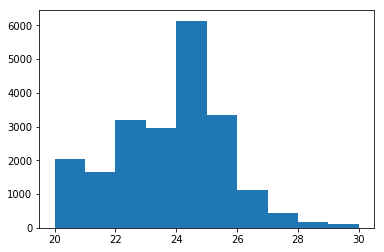

In [18]:
# Data exploration
plt.hist(df[df['LOCATION']=='H'].SHOT_DIST, range=(20,30));

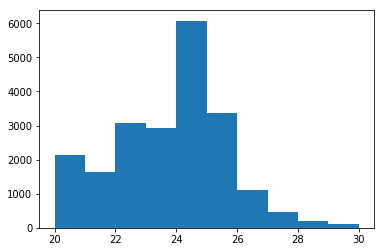

In [19]:
# Data exploration
plt.hist(df[df['LOCATION']=='A'].SHOT_DIST, range=(20,30));

In [20]:
# Data exploration
df[df['LOCATION']=='H'].PTS.value_counts()

0    34661
2    23030
3     6087
Name: PTS, dtype: int64

In [21]:
# Data exploration
df[df['LOCATION']=='A'].PTS.value_counts()

0    35278
2    22873
3     5810
Name: PTS, dtype: int64

In [22]:
# Data exploration
df['LOCATION'].value_counts()

A    63961
H    63778
Name: LOCATION, dtype: int64

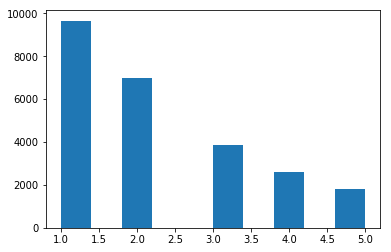

In [23]:
# Data exploration
plt.hist(df[df['LOCATION']=='H'].DRIBBLES, range=(1,5));

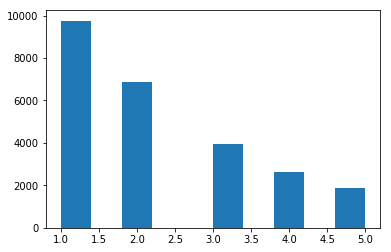

In [24]:
# Data exploration
plt.hist(df[df['LOCATION']=='A'].DRIBBLES, range=(1,5));

In [25]:
# Mapping shot results 
df['SHOT_RESULT'] = df['SHOT_RESULT'].map({'missed': 0, 'made': 1})

In [26]:
df['SHOT_RESULT'].mean()

0.4524851454919797

In [27]:
# Data exploration
df.query('LOCATION == "H" and PTS_TYPE == 2')['SHOT_RESULT'].mean()

0.4927257167308515

In [28]:
# Data exploration
df.query('LOCATION == "A" and PTS_TYPE == 2')['SHOT_RESULT'].mean()

0.4850804826840286

In [29]:
df.columns

Index(['Unnamed: 0', 'ID', 'GAME_ID', 'MATCHUP', 'LOCATION', 'W',
       'FINAL_MARGIN', 'SHOT_NUMBER', 'PERIOD', 'GAME_CLOCK', 'SHOT_CLOCK',
       'DRIBBLES', 'TOUCH_TIME', 'SHOT_DIST', 'PTS_TYPE', 'SHOT_RESULT',
       'CLOSEST_DEFENDER', 'CLOSEST_DEFENDER_PLAYER_ID', 'CLOSE_DEF_DIST',
       'FGM', 'PTS', 'player_name', 'player_id', 'CLOSEST_DEFENDER1',
       'SHOOTER_height', 'DEFENDER_height'],
      dtype='object')

In [30]:
# Creating a new column for whether the shooter is taller than the defender or not
df.loc[df['SHOOTER_height'] > df['DEFENDER_height'], 'IS_TALLER'] = 1
df.loc[df['SHOOTER_height'] <= df['DEFENDER_height'], 'IS_TALLER'] = 0

In [31]:
df

,Unnamed: 0,ID,GAME_ID,MATCHUP,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,...,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_name,player_id,CLOSEST_DEFENDER1,SHOOTER_height,DEFENDER_height,IS_TALLER
0,0,1,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,1,1,69,...,101187,1.3,1,2,brian roberts,203148,Alan Anderson,73,78,0.0
1,1,2,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,2,1,14,...,202711,6.1,0,0,brian roberts,203148,Bojan Bogdanovic,73,80,0.0
2,2,3,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,3,1,0,...,202711,0.9,0,0,brian roberts,203148,Bojan Bogdanovic,73,80,0.0
3,3,4,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,4,2,707,...,203900,3.4,0,0,brian roberts,203148,Markel Brown,73,75,0.0
4,4,5,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,5,2,634,...,201152,1.1,0,0,brian roberts,203148,Thaddeus Young,73,80,0.0
5,5,6,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,6,2,495,...,101114,2.6,0,0,brian roberts,203148,Deron Williams,73,75,0.0
6,6,7,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,7,4,615,...,101127,6.1,0,0,brian roberts,203148,Jarrett Jack,73,75,0.0
7,7,8,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,8,4,480,...,203486,2.1,1,2,brian roberts,203148,Mason Plumlee,73,83,0.0
8,8,9,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,9,4,314,...,202721,7.3,0,0,brian roberts,203148,Darius Morris,73,76,0.0
9,9,10,21400890,"MAR 03, 2015 - CHA vs. LAL",H,W,1,1,2,692,...,201961,19.8,0,0,brian roberts,203148,Wayne Ellington,73,76,0.0


In [32]:
# Converting the new column's type from float to int64
df['IS_TALLER'] = df['IS_TALLER'].astype('int64')

In [33]:
df

,Unnamed: 0,ID,GAME_ID,MATCHUP,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,...,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_name,player_id,CLOSEST_DEFENDER1,SHOOTER_height,DEFENDER_height,IS_TALLER
0,0,1,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,1,1,69,...,101187,1.3,1,2,brian roberts,203148,Alan Anderson,73,78,0
1,1,2,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,2,1,14,...,202711,6.1,0,0,brian roberts,203148,Bojan Bogdanovic,73,80,0
2,2,3,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,3,1,0,...,202711,0.9,0,0,brian roberts,203148,Bojan Bogdanovic,73,80,0
3,3,4,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,4,2,707,...,203900,3.4,0,0,brian roberts,203148,Markel Brown,73,75,0
4,4,5,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,5,2,634,...,201152,1.1,0,0,brian roberts,203148,Thaddeus Young,73,80,0
5,5,6,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,6,2,495,...,101114,2.6,0,0,brian roberts,203148,Deron Williams,73,75,0
6,6,7,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,7,4,615,...,101127,6.1,0,0,brian roberts,203148,Jarrett Jack,73,75,0
7,7,8,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,8,4,480,...,203486,2.1,1,2,brian roberts,203148,Mason Plumlee,73,83,0
8,8,9,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,9,4,314,...,202721,7.3,0,0,brian roberts,203148,Darius Morris,73,76,0
9,9,10,21400890,"MAR 03, 2015 - CHA vs. LAL",H,W,1,1,2,692,...,201961,19.8,0,0,brian roberts,203148,Wayne Ellington,73,76,0


In [34]:
df.query('IS_TALLER == 1 and PTS_TYPE == 2')['SHOT_RESULT'].mean()

0.5106311265904558

In [35]:
df.query('IS_TALLER == 0 and PTS_TYPE == 2')['SHOT_RESULT'].mean()

0.47560473494595984

In [36]:
df.query('IS_TALLER == 1 and PTS_TYPE == 3')['SHOT_RESULT'].mean()

0.35226811653006573

In [37]:
df.query('IS_TALLER == 0 and PTS_TYPE == 3')['SHOT_RESULT'].mean()

0.3510663011661943

In [38]:
# Dropping unnecessary columns
df_new = df.drop(columns=['Unnamed: 0', 'W', 'ID', 'GAME_ID', 'MATCHUP', 'FINAL_MARGIN', 'CLOSEST_DEFENDER_PLAYER_ID', 'player_id', 'CLOSEST_DEFENDER1', 'CLOSEST_DEFENDER', 'SHOOTER_height', 'DEFENDER_height', 'FGM', 'PTS', 'player_name' ], axis=1)

In [39]:
df_new.head()

,LOCATION,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSE_DEF_DIST,IS_TALLER
0,A,1,1,69,10.8,2,1.9,7.7,2,1,1.3,0
1,A,2,1,14,3.4,0,0.8,28.2,3,0,6.1,0
2,A,3,1,0,0.0,3,2.7,10.1,2,0,0.9,0
3,A,4,2,707,10.3,2,1.9,17.2,2,0,3.4,0
4,A,5,2,634,10.9,2,2.7,3.7,2,0,1.1,0


In [40]:
# Creating a dummy variable for location
dummy = pd.get_dummies(df_new['LOCATION'])

In [41]:
dummy

,A,H
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
5,1,0
6,1,0
7,1,0
8,1,0
9,0,1


In [42]:
df_final = pd.concat([df_new, dummy], axis=1)

In [43]:
df_final = df_final.drop(columns=['LOCATION'], axis=1)

In [44]:
df_final.head()

,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSE_DEF_DIST,IS_TALLER,A,H
0,1,1,69,10.8,2,1.9,7.7,2,1,1.3,0,1,0
1,2,1,14,3.4,0,0.8,28.2,3,0,6.1,0,1,0
2,3,1,0,0.0,3,2.7,10.1,2,0,0.9,0,1,0
3,4,2,707,10.3,2,1.9,17.2,2,0,3.4,0,1,0
4,5,2,634,10.9,2,2.7,3.7,2,0,1.1,0,1,0


In [45]:
df_final.shape

(127739, 13)

In [46]:
df_final

,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSE_DEF_DIST,IS_TALLER,A,H
0,1,1,69,10.8,2,1.9,7.7,2,1,1.3,0,1,0
1,2,1,14,3.4,0,0.8,28.2,3,0,6.1,0,1,0
2,3,1,0,0.0,3,2.7,10.1,2,0,0.9,0,1,0
3,4,2,707,10.3,2,1.9,17.2,2,0,3.4,0,1,0
4,5,2,634,10.9,2,2.7,3.7,2,0,1.1,0,1,0
5,6,2,495,9.1,2,4.4,18.4,2,0,2.6,0,1,0
6,7,4,615,14.5,11,9.0,20.7,2,0,6.1,0,1,0
7,8,4,480,3.4,3,2.5,3.5,2,1,2.1,0,1,0
8,9,4,314,12.4,0,0.8,24.6,3,0,7.3,0,1,0
9,1,2,692,17.4,0,1.1,22.4,3,0,19.8,0,0,1


## Data Modeling

In [47]:
# Creating X and y values
X = df_final.drop('SHOT_RESULT', axis=1)
y = df_final['SHOT_RESULT']

In [48]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)

C:\Users\amism\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\amism\anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [49]:
scaled_data

array([[-1.16822086, -1.28918708, -1.36065597, ..., -0.77490555,
         0.99856842, -0.99856842],
       [-0.95603859, -1.28918708, -1.62561092, ..., -0.77490555,
         0.99856842, -0.99856842],
       [-0.74385632, -1.28918708, -1.69305399, ..., -0.77490555,
         0.99856842, -0.99856842],
       ...,
       [ 0.10487275,  1.34262449,  1.53457895, ..., -0.77490555,
         0.99856842, -0.99856842],
       [ 0.31705501,  1.34262449, -0.93672807, ...,  1.29047984,
         0.99856842, -0.99856842],
       [ 0.52923728,  1.34262449, -1.63524564, ...,  1.29047984,
         0.99856842, -0.99856842]])

In [50]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state =42)

In [51]:
# Training the model
model = AdaBoostClassifier(n_estimators=2000, learning_rate=0.01)
model.fit(X_train, y_train)
preds = model.predict(X_test)

## Evaluate the Results

In [52]:
acc = accuracy_score(y_test, preds)

In [53]:
acc

0.6178773070171276

In [54]:
model.feature_importances_

array([0.    , 0.    , 0.016 , 0.111 , 0.    , 0.1115, 0.422 , 0.    ,
       0.305 , 0.0345, 0.    , 0.    ])

In [55]:
pd.DataFrame(model.feature_importances_, index = X.columns)

,0
SHOT_NUMBER,0.0000
PERIOD,0.0000
GAME_CLOCK,0.0160
SHOT_CLOCK,0.1110
DRIBBLES,0.0000
TOUCH_TIME,0.1115
SHOT_DIST,0.4220
PTS_TYPE,0.0000
CLOSE_DEF_DIST,0.3050
IS_TALLER,0.0345


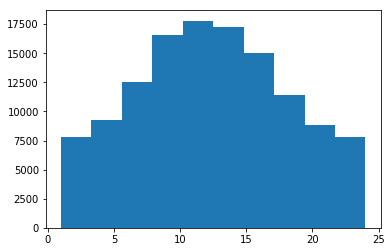

In [56]:
plt.hist(df.SHOT_CLOCK, range=(1,24));